# Cluster Anyalysis Of Global Devlopment Measurements

In [1]:
## importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('World_development_mesurement.xlsx')
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [4]:
df['Country'].nunique()

208

In [5]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
df['Country_code'] = le.fit_transform(df['Country'])
df['Country_code']=df['Country_code'].astype(float)
df.drop(['Country'],axis=1,inplace=True)

In [6]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_code
0,0.020,NaN,87931.0,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",29.0


In [7]:
## Remove $ from columns
df['GDP']=df['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
df['GDP']=pd.to_numeric(df['GDP'],errors='coerce')

df['Health Exp/Capita']=df['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
df['Health Exp/Capita']=pd.to_numeric(df['Health Exp/Capita'], errors='coerce')

df['Tourism Inbound']=df['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
df['Tourism Inbound'] = pd.to_numeric(df['Tourism Inbound'], errors='coerce')

df['Tourism Outbound']=df['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
df['Tourism Outbound'] = pd.to_numeric(df['Tourism Outbound'], errors='coerce')

## Remove %
df['Business Tax Rate']=df['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
df['Business Tax Rate'] = pd.to_numeric(df['Business Tax Rate'], errors='coerce')

df['Number of Records']=df['Number of Records'].astype('float64')
df['Population Total']=df['Population Total'].astype('float64')
df['Country_code']=df['Country_code'].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       1932 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [10]:
df.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_code
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,1932.000000,1416.000000,...,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,214.627847,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,103.50000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,233.750350,273.299686,...,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,0.00000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,37.000000,156.000000,...,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08,51.75000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,115.500000,239.000000,...,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08,103.50000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,318.250000,344.750000,...,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,998.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,207.00000


In [11]:
## Drop "Number of Records" column
df = df.drop(['Number of Records'],axis=1)

In [12]:
## Check Columns
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_code'],
      dtype='object')

In [13]:
## Rename columns
df = df.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
df.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound', 'Country_code'],
      dtype='object')

In [14]:
df.isnull().sum().sum()

12203

In [15]:
df.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
Country_code               0
dtype: int64

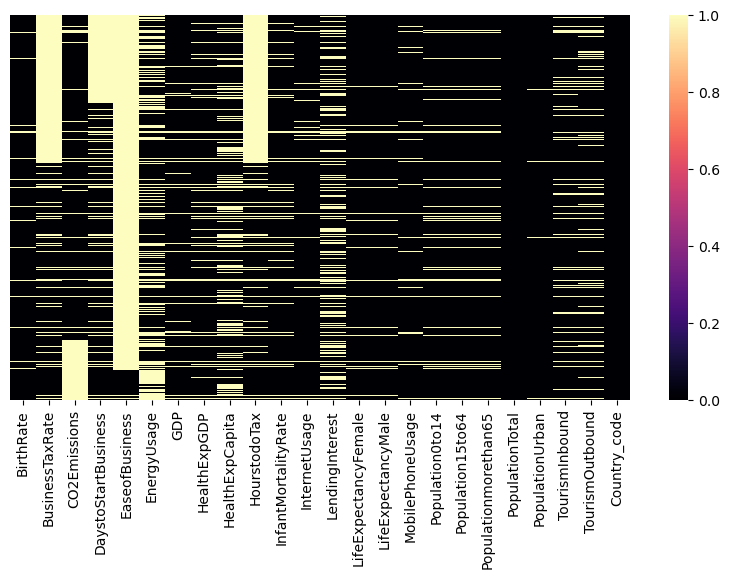

In [16]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

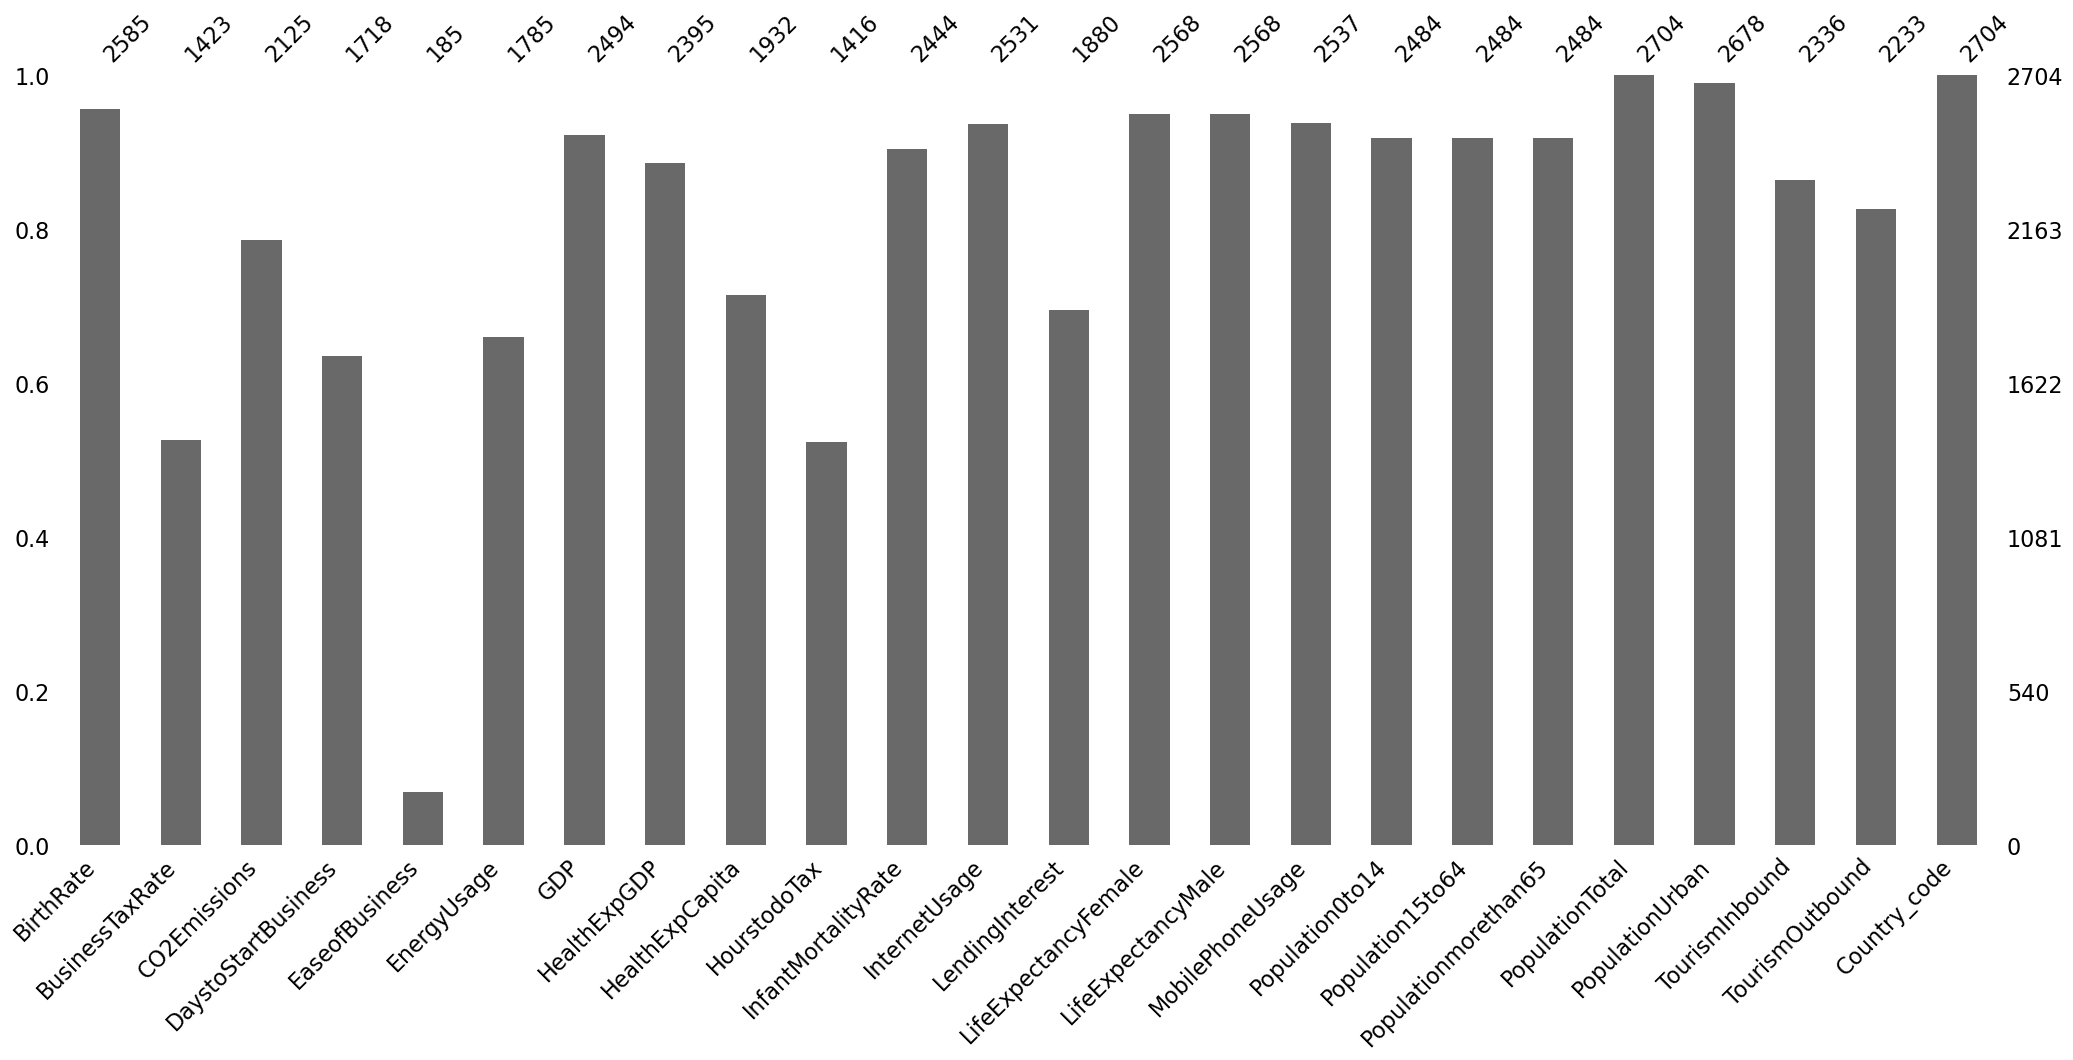

In [17]:
import missingno as msno
msno.bar(df)
plt.show()

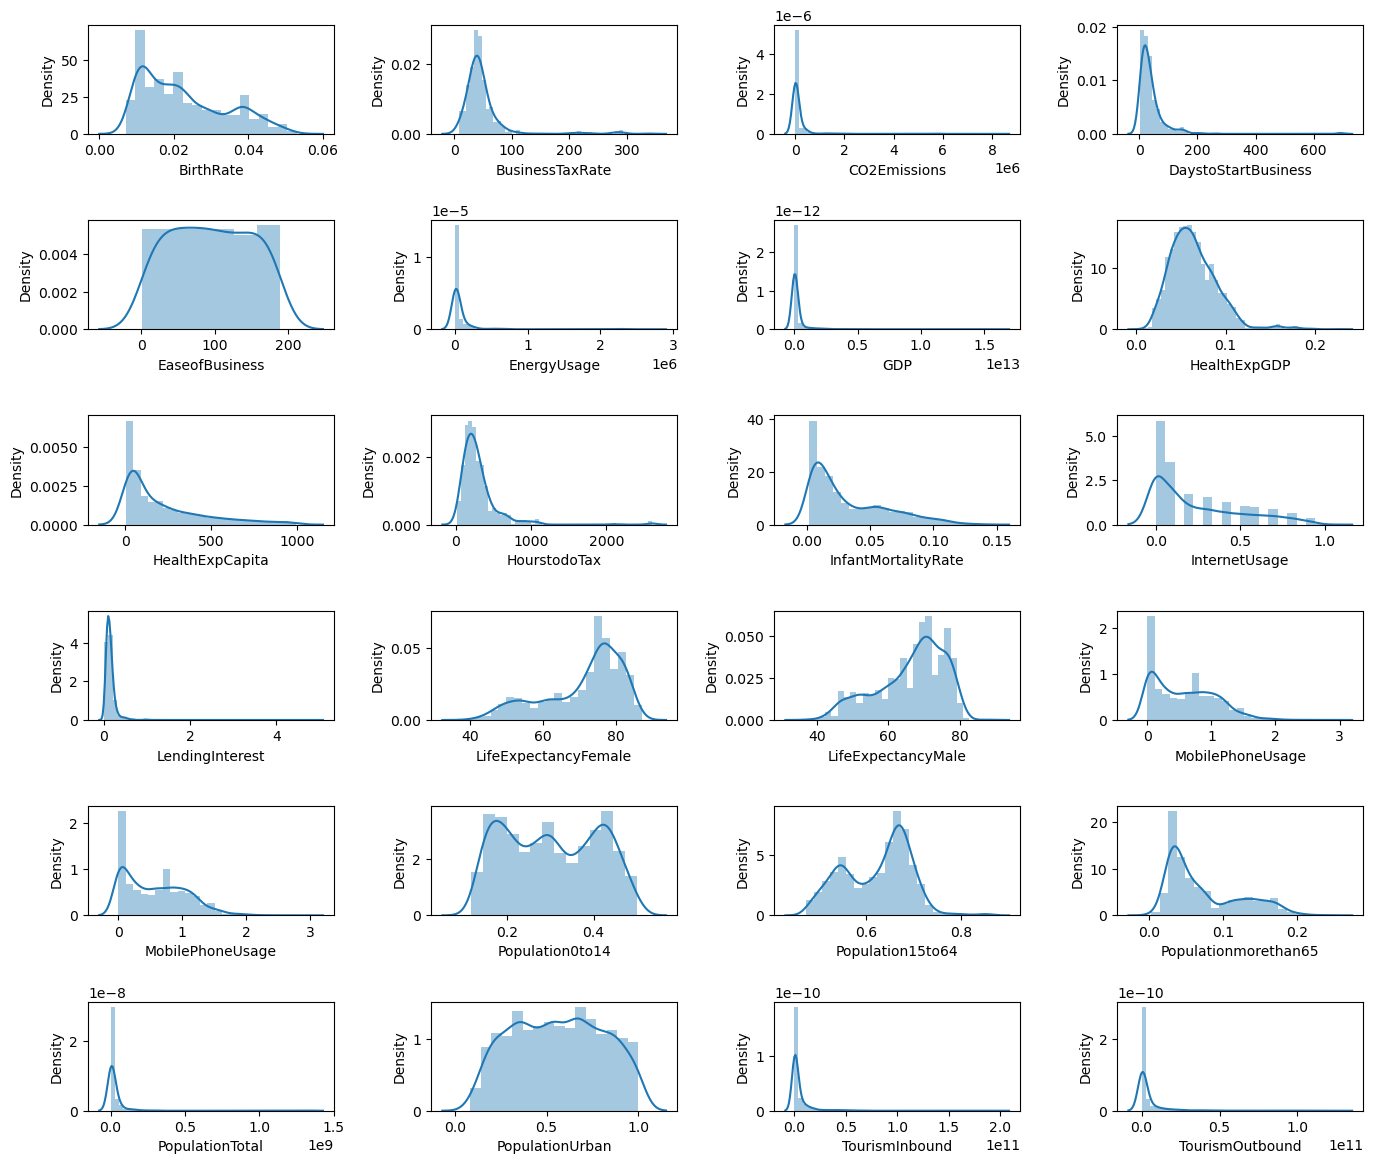

In [18]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(df.BirthRate,ax=axes[0,0])
sns.distplot(df.BusinessTaxRate,ax=axes[0,1])
sns.distplot(df.CO2Emissions,ax=axes[0,2])
sns.distplot(df.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(df.EaseofBusiness,ax=axes[1,0])
sns.distplot(df.EnergyUsage,ax=axes[1,1])
sns.distplot(df.GDP,ax=axes[1,2])
sns.distplot(df.HealthExpGDP,ax=axes[1,3])
sns.distplot(df.HealthExpCapita,ax=axes[2,0])
sns.distplot(df.HourstodoTax,ax=axes[2,1])
sns.distplot(df.InfantMortalityRate,ax=axes[2,2])
sns.distplot(df.InternetUsage,ax=axes[2,3])
sns.distplot(df.LendingInterest,ax=axes[3,0])
sns.distplot(df.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(df.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(df.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(df.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(df.Population0to14,ax=axes[4,1])
sns.distplot(df.Population15to64,ax=axes[4,2])
sns.distplot(df.Populationmorethan65,ax=axes[4,3])
sns.distplot(df.PopulationTotal,ax=axes[5,0])
sns.distplot(df.PopulationUrban,ax=axes[5,1])
sns.distplot(df.TourismInbound,ax=axes[5,2])
sns.distplot(df.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

In [19]:
## Replace missing values by mean

df['BusinessTaxRate'] = df['BusinessTaxRate'].fillna(df['BusinessTaxRate'].mean())
df['EaseofBusiness'] = df['EaseofBusiness'].fillna(df['EaseofBusiness'].mean())
df['HealthExpGDP'] = df['HealthExpGDP'].fillna(df['HealthExpGDP'].mean())
df['HourstodoTax'] = df['HourstodoTax'].fillna(df['HourstodoTax'].mean())
df['Population0to14'] = df['Population0to14'].fillna(df['Population0to14'].mean())
df['PopulationUrban'] = df['PopulationUrban'].fillna(df['PopulationUrban'].mean())
df['HealthExpCapita']=df['HealthExpCapita'].fillna(df['HealthExpCapita'].mean())

## Replace missing values by median

df['BirthRate'] = df['BirthRate'].fillna(df['BirthRate'].median())
df['CO2Emissions'] = df['CO2Emissions'].fillna(df['CO2Emissions'].median())
df['DaystoStartBusiness'] = df['DaystoStartBusiness'].fillna(df['DaystoStartBusiness'].median())
df['EnergyUsage'] = df['EnergyUsage'].fillna(df['EnergyUsage'].median())
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['InfantMortalityRate'] = df['InfantMortalityRate'].fillna(df['InfantMortalityRate'].median())
df['InternetUsage'] = df['InternetUsage'].fillna(df['InternetUsage'].median())
df['LendingInterest'] = df['LendingInterest'].fillna(df['LendingInterest'].median())
df['LifeExpectancyFemale'] = df['LifeExpectancyFemale'].fillna(df['LifeExpectancyFemale'].median())
df['LifeExpectancyMale'] = df['LifeExpectancyMale'].fillna(df['LifeExpectancyMale'].median())
df['MobilePhoneUsage'] = df['MobilePhoneUsage'].fillna(df['MobilePhoneUsage'].median())
df['TourismInbound'] = df['TourismInbound'].fillna(df['TourismInbound'].median())
df['TourismOutbound'] = df['TourismOutbound'].fillna(df['TourismOutbound'].median())
df['Population15to64'] = df['Population15to64'].fillna(df['Population15to64'].median())
df['Populationmorethan65'] = df['Populationmorethan65'].fillna(df['Populationmorethan65'].median())

In [20]:
print("{} missing values present in whole data.".format(df.isnull().sum().sum()))

0 missing values present in whole data.


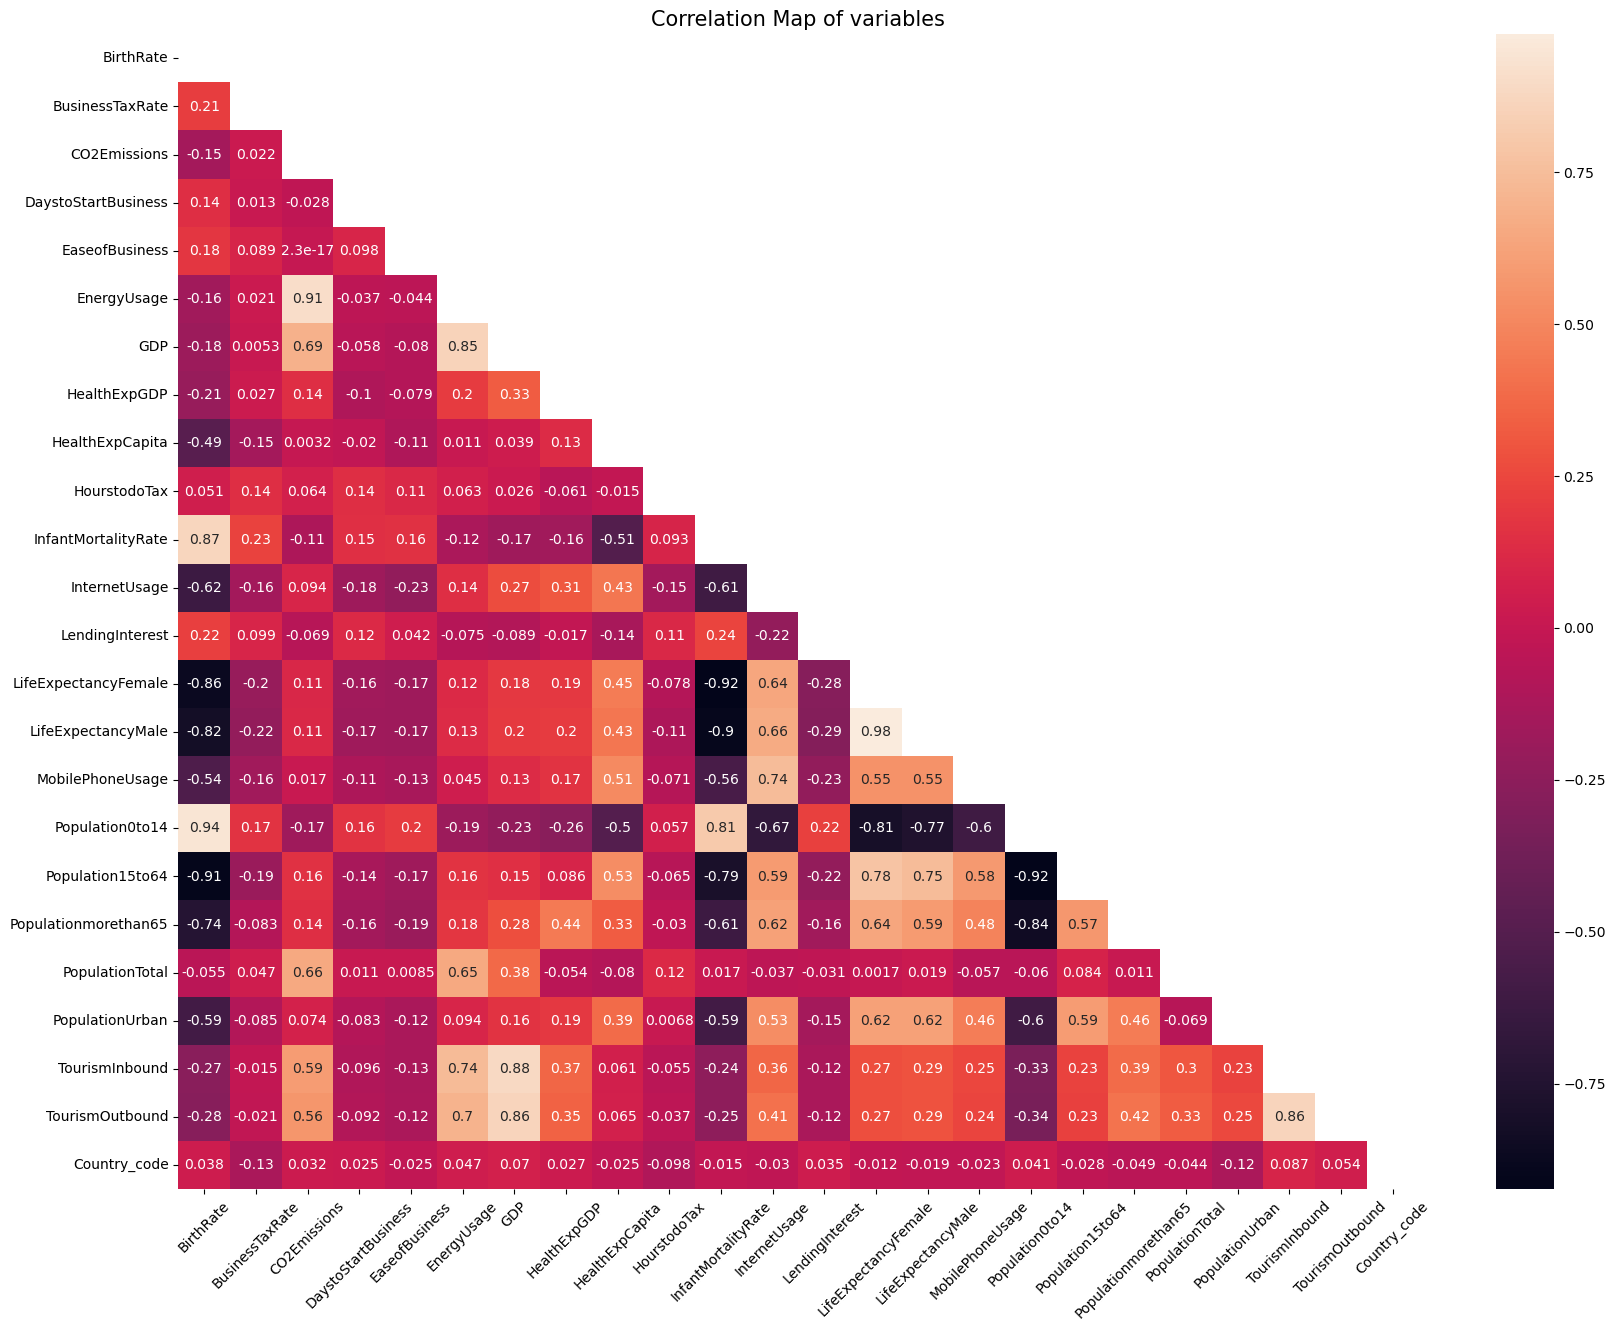

In [21]:
# Create a mask for the upper diagonal values
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
## visualise relation between variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, mask=mask)
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=15)
plt.show()

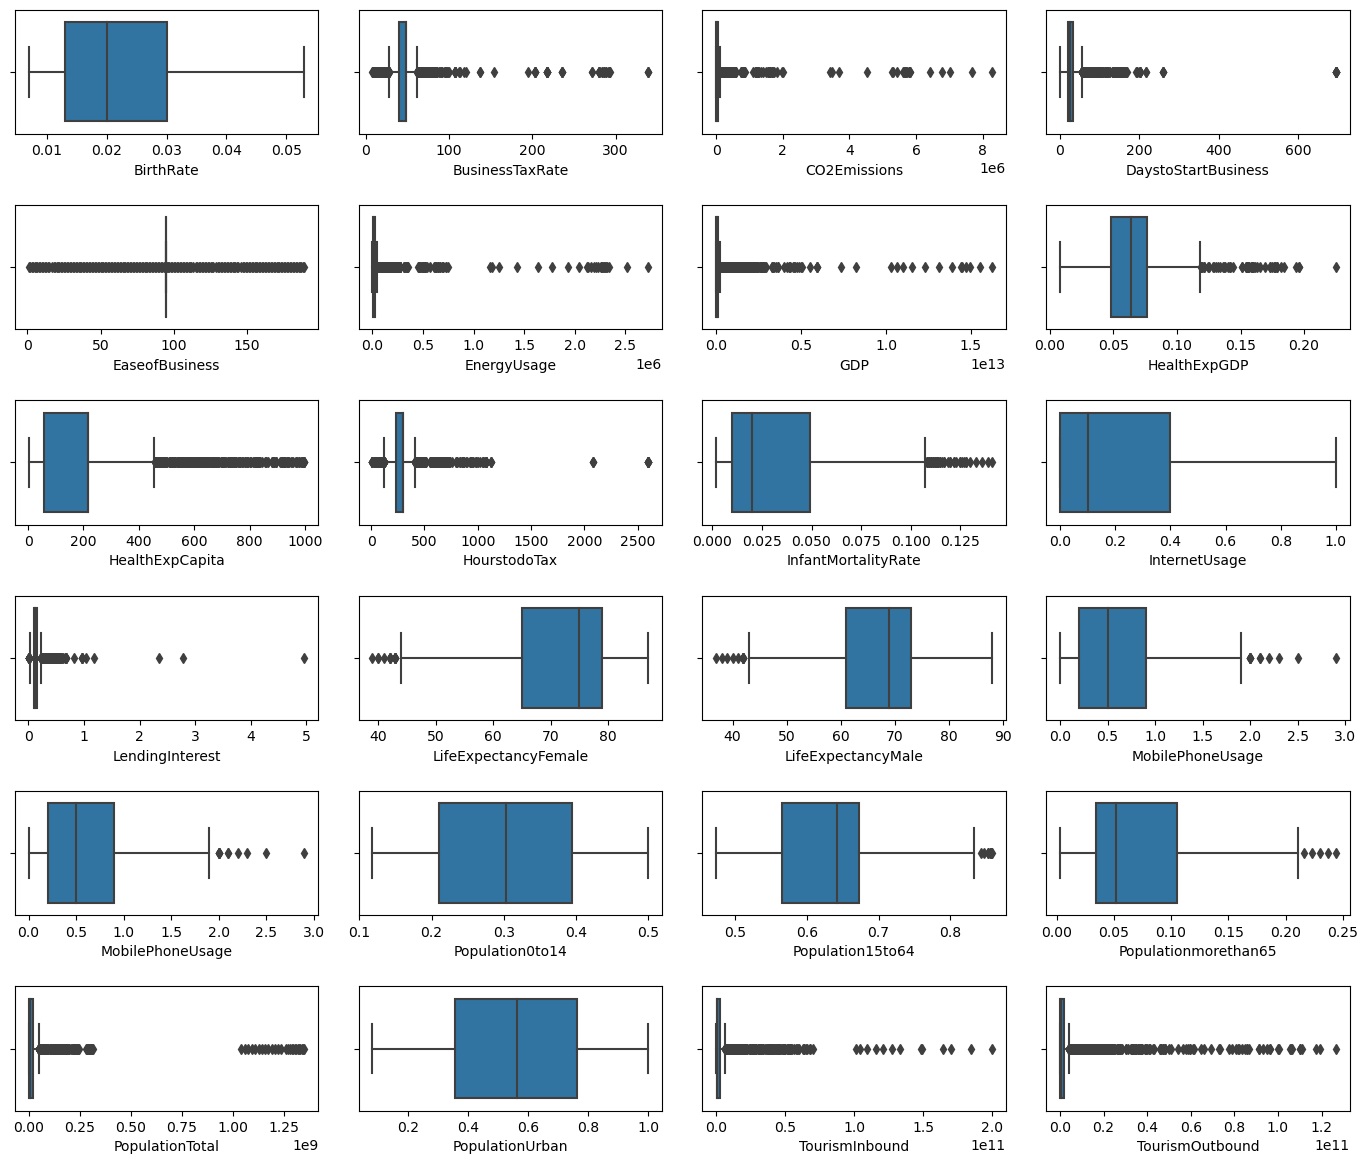

In [22]:
## Check outliers present in df
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(df.BirthRate,ax=axes[0,0])
sns.boxplot(df.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(df.CO2Emissions,ax=axes[0,2])
sns.boxplot(df.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(df.EaseofBusiness,ax=axes[1,0])
sns.boxplot(df.EnergyUsage,ax=axes[1,1])
sns.boxplot(df.GDP,ax=axes[1,2])
sns.boxplot(df.HealthExpGDP,ax=axes[1,3])
sns.boxplot(df.HealthExpCapita,ax=axes[2,0])
sns.boxplot(df.HourstodoTax,ax=axes[2,1])
sns.boxplot(df.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(df.InternetUsage,ax=axes[2,3])
sns.boxplot(df.LendingInterest,ax=axes[3,0])
sns.boxplot(df.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(df.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(df.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(df.MobilePhoneUsage,ax=axes[4,0])
sns.boxplot(df.Population0to14,ax=axes[4,1])
sns.boxplot(df.Population15to64,ax=axes[4,2])
sns.boxplot(df.Populationmorethan65,ax=axes[4,3])
sns.boxplot(df.PopulationTotal,ax=axes[5,0])
sns.boxplot(df.PopulationUrban,ax=axes[5,1])
sns.boxplot(df.TourismInbound,ax=axes[5,2])
sns.boxplot(df.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

# Conclusion
Some columns like "Population Total", "Tourism in bound", "Tourism out bound" has large number of outlier present. columns like "Population Urban", "Population 0 to 14" has less number of outliers.

# Model Building

In [23]:
#standardization of data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_std=scaler.fit_transform(df)

In [24]:
df_std=pd.DataFrame(data_std)
df_std

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.233864,4.784937e-16,-0.046899,-0.192652,0.000000,-0.135363,-0.174562,-1.177630e+00,-0.782794,0.000000,...,0.044785,-1.246165,3.813704e-01,-0.090043,-0.683981,0.002110,0.147333,-0.328776,-0.311777,-1.690435
1,2.469335,4.784937e-16,-0.189777,-0.192652,0.000000,-0.226814,-0.216569,-1.218002e+00,-0.975167,0.000000,...,-2.464476,-1.246165,1.693440e+00,-1.882290,-0.976654,-0.141087,-0.976646,-0.334026,-0.315641,-1.640471
2,1.838589,4.784937e-16,-0.204222,-0.192652,0.000000,-0.252684,-0.222797,-8.546543e-01,-1.010604,0.000000,...,-1.482591,-1.246165,1.478026e+00,-1.613453,-0.893033,-0.197221,-0.735502,-0.330706,-0.323534,-1.390653
3,0.396882,4.784937e-16,-0.199376,-0.192652,0.000000,-0.253374,-0.219643,-6.931666e-01,-0.317050,0.000000,...,-1.918984,-1.028797,7.828246e-01,-0.567976,-0.893033,-0.239018,-0.126509,-0.319126,-0.310461,-1.307380
4,2.108909,4.784937e-16,-0.205272,-0.192652,0.000000,-0.194739,-0.222566,-5.316789e-01,-1.025791,0.000000,...,-1.918984,-1.246165,1.615108e+00,-1.792677,-0.913938,-0.159732,-1.573377,-0.334875,-0.325178,-1.240762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.233864,4.784937e-16,-0.191624,-0.192652,0.000000,-0.194739,-0.211095,1.680819e-15,0.000000,0.000000,...,0.262982,-0.159328,-2.717705e-15,0.260938,-0.412213,-0.252883,1.422539,-0.283499,-0.290153,1.490580
2700,-0.864611,-8.643011e-02,-0.191624,-0.647500,-6.358075,9.739309,14.719861,4.635928e+00,0.000000,-0.642723,...,1.026670,0.927509,-1.048198e+00,0.626855,1.343825,2.272669,1.013819,15.110276,10.078976,1.573853
2701,-0.684397,-2.379496e-01,-0.191624,-0.604181,-0.690947,-0.194739,-0.178964,1.002454e+00,0.000000,0.040118,...,0.808473,2.014346,-8.132005e-01,0.208665,1.427446,-0.225822,1.573765,-0.165114,-0.243125,1.590507
2702,-0.233864,4.354703e-01,-0.191624,2.363162,5.955685,-0.194739,0.125811,-7.335385e-01,1.915487,2.478114,...,0.590277,0.927509,-1.473741e-01,0.402825,-0.244971,-0.012091,1.332620,-0.266862,-0.064382,1.640471


## Hierarchical Clustering
Linkages

Types of Linkages:-

1) Single Leakage 2) Complete Linkage 3) Average Linkage 4)Ward Method

In [25]:
#Importing standard scaler library for transformation, & hierarchy from scipy for Hierarchical Clustering
import scipy.cluster.hierarchy as sch

## 1) Single Leakage:
The distance between 2 clusters is defined as the shortest distance between points in the two clusters`

Text(0, 0.5, 'Euclidean distances')

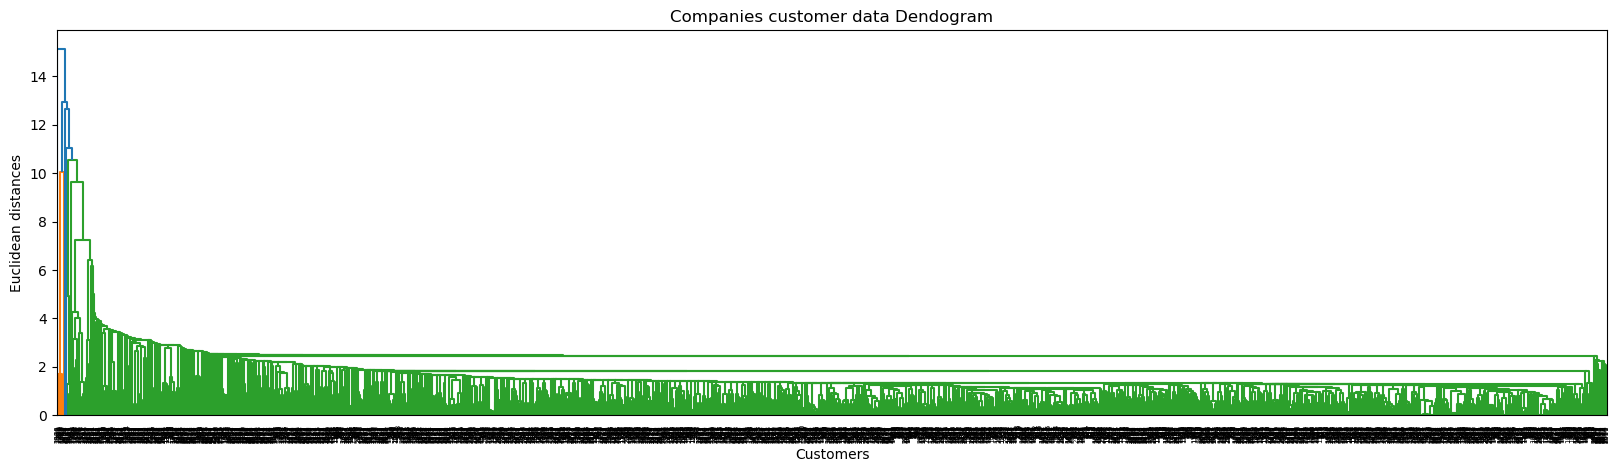

In [26]:
plt.figure(figsize=(20,5))
plt.title("Companies customer data Dendogram")
dend = sch.dendrogram(sch.linkage(df_std, method='single'))
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

## 2) Complete Linkage:
The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

Text(0, 0.5, 'Euclidean distances')

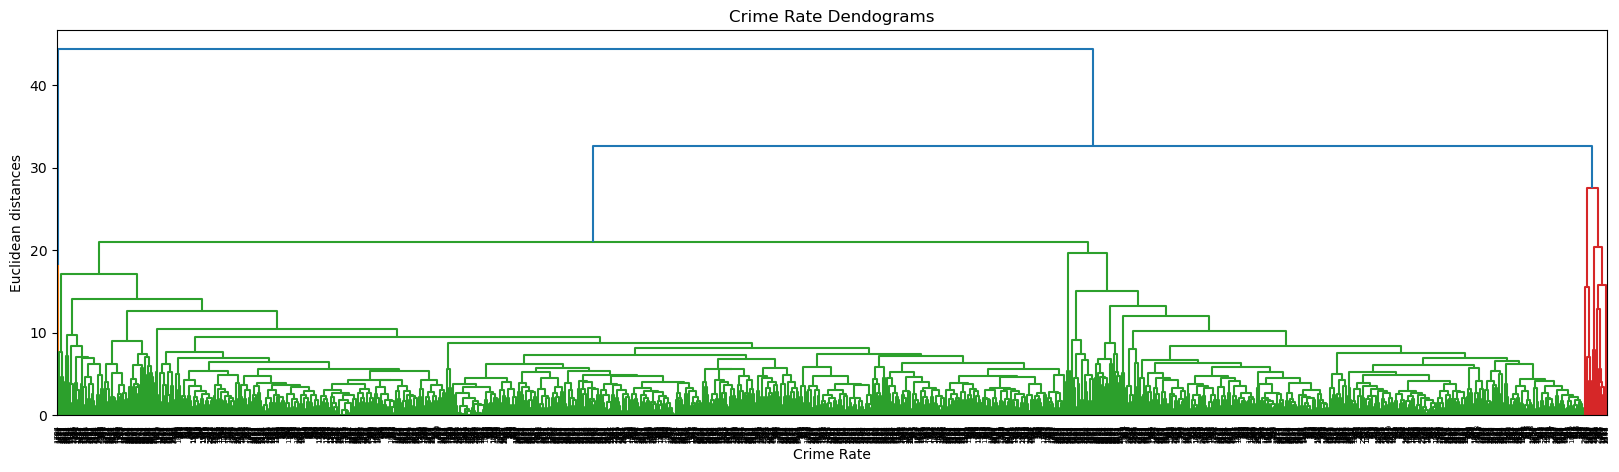

In [33]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(df_std, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

# 3) Average Linkage:
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Euclidean distances')

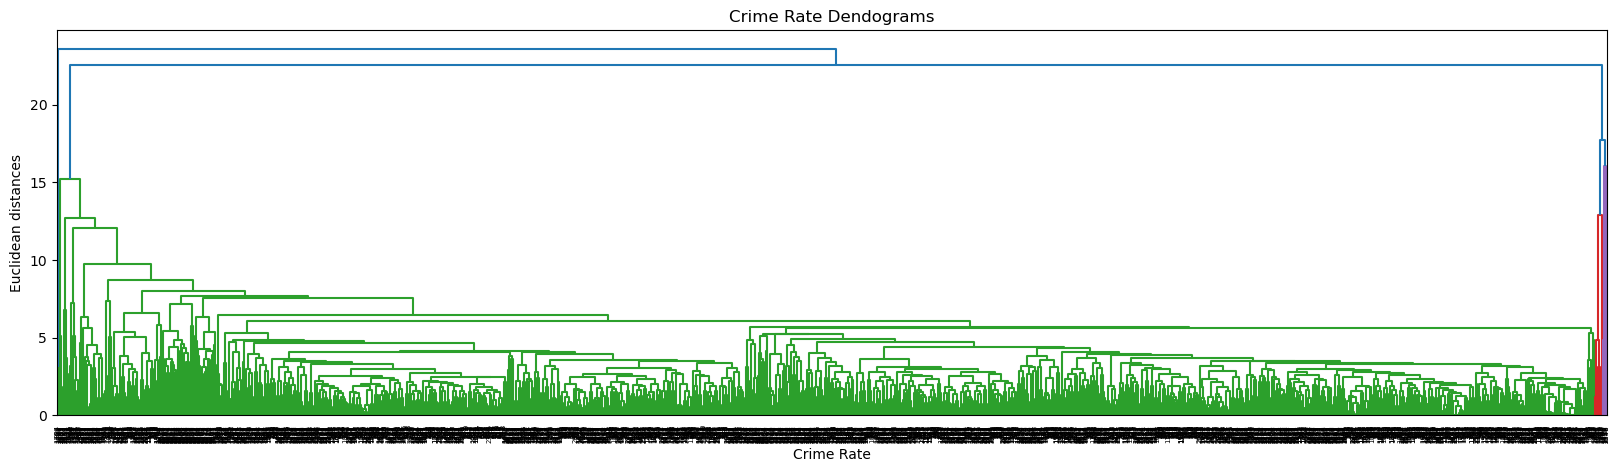

In [34]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(df_std, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

# 4)Ward
wardmethod is actually a method that tries to minimize the variance within each cluster.

Text(0, 0.5, 'Euclidean distances')

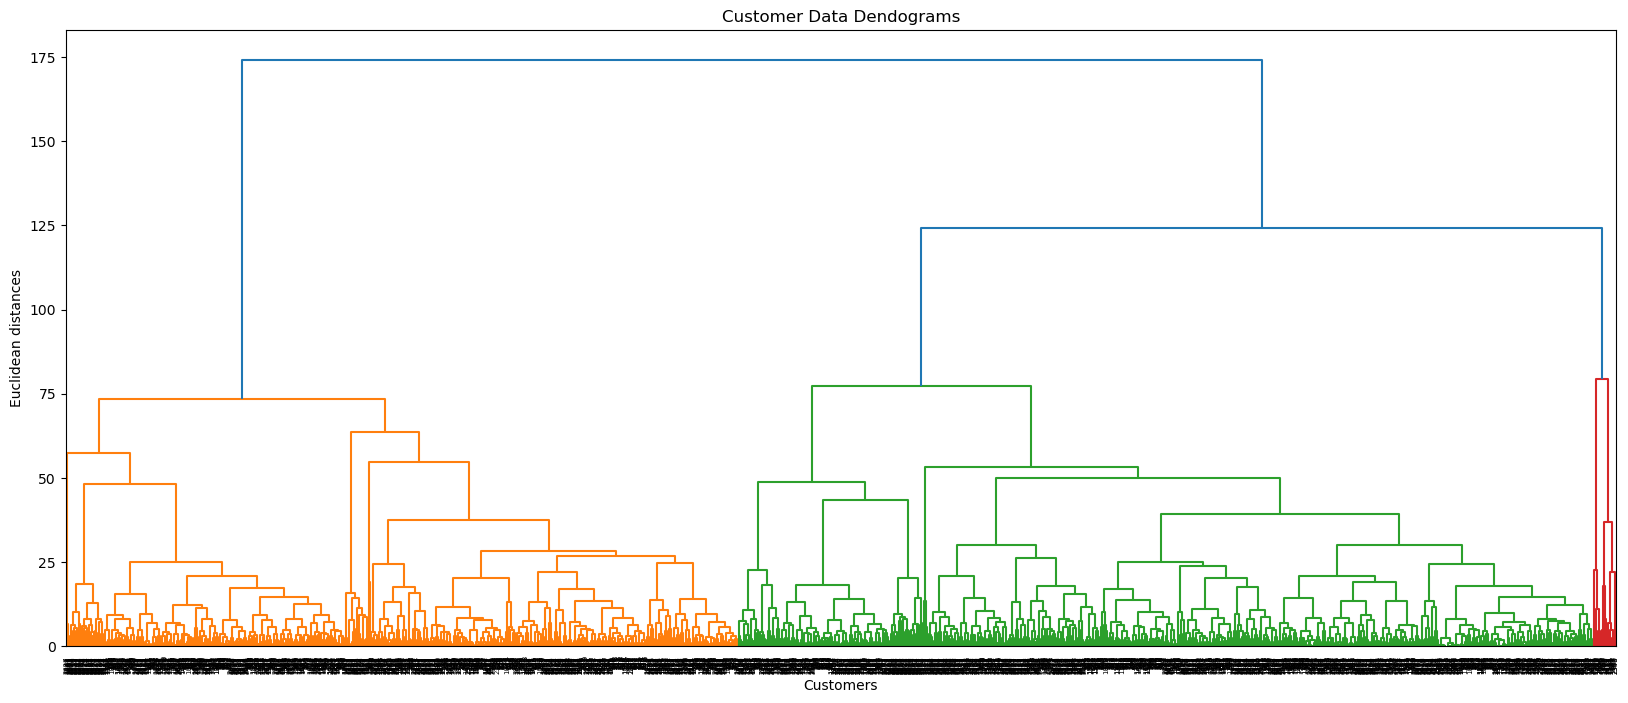

In [35]:
plt.figure(figsize=(20,8))
plt.title("Customer Data Dendograms")
dend = sch.dendrogram(sch.linkage(df_std, method='ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

# Observation:-
With Single,complet & average Leakage clusters is not good structure vise, the dendograph is messy wecannot find optimumnumbers of cluster visually.

With Ward clusters is well placed in shape of inverse tree.

Effective numbers of cluster is 4, Beacause as we go below 4 cluster the diffrence in Euclidean/Vertical distances is higher, but we will also use silhouette score method to find optimum numbers of cluster.

# Numbers Of Clusters
Silhouette Score method.

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [37]:
for linkage in ['average','complete','single','ward']:
    for i in range(2, 21):
        hie_cluster1 = AgglomerativeClustering(n_clusters=i,linkage=linkage) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(data_std)
        silhouette_score1 = silhouette_score(data_std, hie_labels1)
        print(f"For n_clusters = {i}The {linkage} silhouette_score is :- {silhouette_score1}")
        print()

For n_clusters = 2The average silhouette_score is :- 0.7469739092363857

For n_clusters = 3The average silhouette_score is :- 0.7384551120056199

For n_clusters = 4The average silhouette_score is :- 0.710756214533668

For n_clusters = 5The average silhouette_score is :- 0.6787787303144069

For n_clusters = 6The average silhouette_score is :- 0.670963004267196

For n_clusters = 7The average silhouette_score is :- 0.6240590942931828

For n_clusters = 8The average silhouette_score is :- 0.6213360403163489

For n_clusters = 9The average silhouette_score is :- 0.6216298743830206

For n_clusters = 10The average silhouette_score is :- 0.5567854059748594

For n_clusters = 11The average silhouette_score is :- 0.5381995518248894

For n_clusters = 12The average silhouette_score is :- 0.4410053118555881

For n_clusters = 13The average silhouette_score is :- 0.36278980190956056

For n_clusters = 14The average silhouette_score is :- 0.2577843375220517

For n_clusters = 15The average silhouette_score

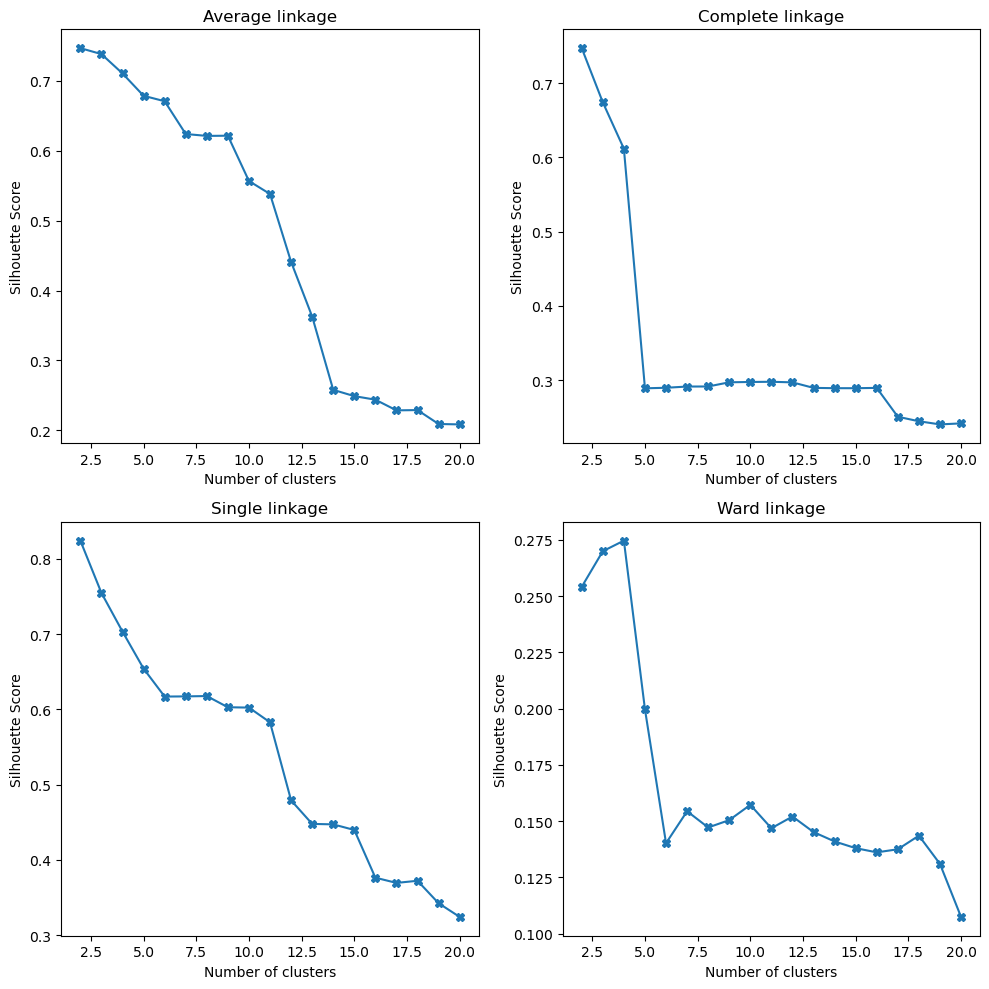

In [38]:
import matplotlib.pyplot as plt

silhouette_scores = {'average': [], 'complete': [], 'single': [], 'ward': []}

for linkage in ['average', 'complete', 'single', 'ward']:
    for i in range(2, 21):
        hie_cluster1 = AgglomerativeClustering(n_clusters=i, linkage=linkage)
        hie_labels1 = hie_cluster1.fit_predict(data_std)
        silhouette_score1 = silhouette_score(data_std, hie_labels1)
        silhouette_scores[linkage].append(silhouette_score1)

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
axes = ax.flatten()

for i, linkage in enumerate(silhouette_scores.keys()):
    axes[i].plot(range(2, 21), silhouette_scores[linkage], marker='X')
    axes[i].set_title(linkage.capitalize() + " linkage")
    axes[i].set_xlabel("Number of clusters")
    axes[i].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

According to Average Linkage method silhoutte score is good till 6 number, between 6 and 7 number there is steep reduction in silhoutte score, we will create custering of 6 numbers.

According to Complete Linkage method silhoutte score of number 4 is 0.6 and 5 number score is directly droped to 0.3. and 4 number of cluster is very less.

According to single linkage's silhoutte score is dropping after 2 numbers , and 2 number of cluster is very less

According to ward Linkage method silhoutte score is rise from 2 to 4 number, between 4 and 5 number score is directly droped to 0.275. we will create custering of 4 numbers

# Creating Clusters with 6 Numbers Using Average Linkage

In [39]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')

In [43]:
_6_hc = hc.fit_predict(data_std)

In [44]:
df['Clusters']=_6_hc

0    2680
1      13
5       6
3       2
2       2
4       1
Name: Clusters, dtype: int64


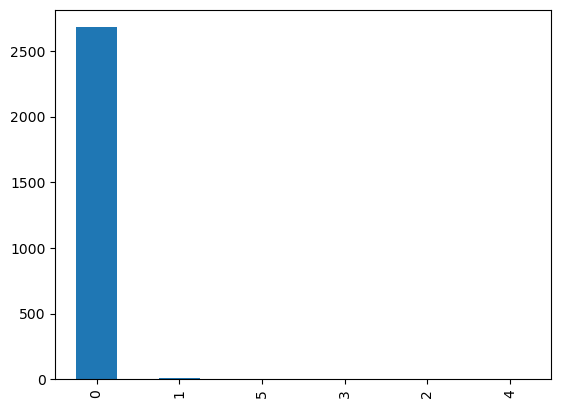

In [45]:
# distribution of data in all clusters
df["Clusters"].value_counts().plot(kind='bar')
print(df["Clusters"].value_counts())

In [46]:
print(f'not good distribution as {(2063/2109)*100}% of data is lies in cluster 0')

not good distribution as 97.81887150308202% of data is lies in cluster 0


# Creating Clusters with 4 Numbers using Complete Linkage

In [47]:
# Create Clusters
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [48]:
# save clusters for chart
_3_hc = hc2.fit_predict(data_std)
_3_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
df.drop(['Clusters'],axis=1,inplace=True)

In [51]:
df['Clusters']=_3_hc

0    2662
2      26
3      13
1       3
Name: Clusters2, dtype: int64


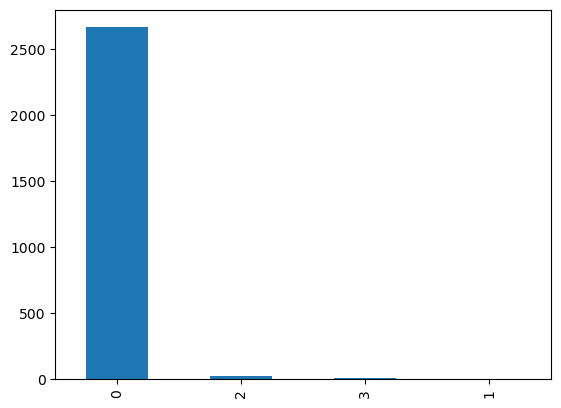

In [52]:
# distribution of data in all clusters
df["Clusters2"].value_counts().plot(kind='bar')
print(df["Clusters2"].value_counts())

# Creating Clusters with 2 Numbers Using Single Linkage

In [53]:
# Create Clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [54]:
# save clusters for chart
_5_hc = hc.fit_predict(data_std)
_5_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
df.drop(['Clusters'],axis=1,inplace=True)

In [55]:
df['Clusters']=_5_hc

0    2662
2      26
3      13
1       3
Name: Clusters, dtype: int64


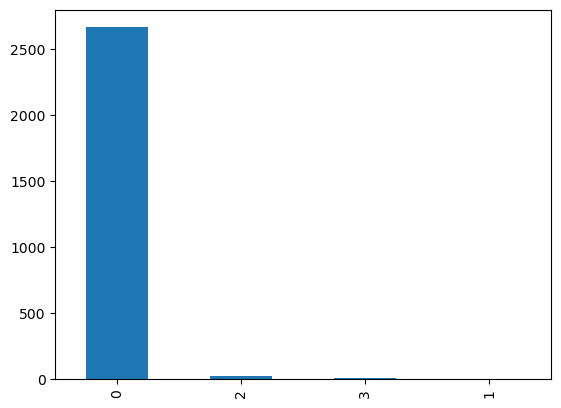

In [56]:
# distribution of data in all clusters
df["Clusters"].value_counts().plot(kind='bar')
print(df["Clusters"].value_counts())

In [57]:
print(f'not good distribution as {(2063/2116)*100}% of data is lies in cluster 0')

not good distribution as 97.49527410207939% of data is lies in cluster 0


# Conclusion:-
distribution of clustersis good.

We ware geeting cluster number of 6,4 & 2 but distribution of data is not good.

# K-means Clustering

In [59]:
from sklearn.cluster import KMeans
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2704 non-null   float64
 1   1       2704 non-null   float64
 2   2       2704 non-null   float64
 3   3       2704 non-null   float64
 4   4       2704 non-null   float64
 5   5       2704 non-null   float64
 6   6       2704 non-null   float64
 7   7       2704 non-null   float64
 8   8       2704 non-null   float64
 9   9       2704 non-null   float64
 10  10      2704 non-null   float64
 11  11      2704 non-null   float64
 12  12      2704 non-null   float64
 13  13      2704 non-null   float64
 14  14      2704 non-null   float64
 15  15      2704 non-null   float64
 16  16      2704 non-null   float64
 17  17      2704 non-null   float64
 18  18      2704 non-null   float64
 19  19      2704 non-null   float64
 20  20      2704 non-null   float64
 21  21      2704 non-null   float64
 22  

In [60]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

In [61]:
wcss

[48734.75488562531,
 40394.920724422496,
 36083.84315817162,
 33601.62919382211,
 31342.914213152537,
 29333.992616326796,
 28000.849275803623,
 26506.88367498984,
 25254.751495100845]

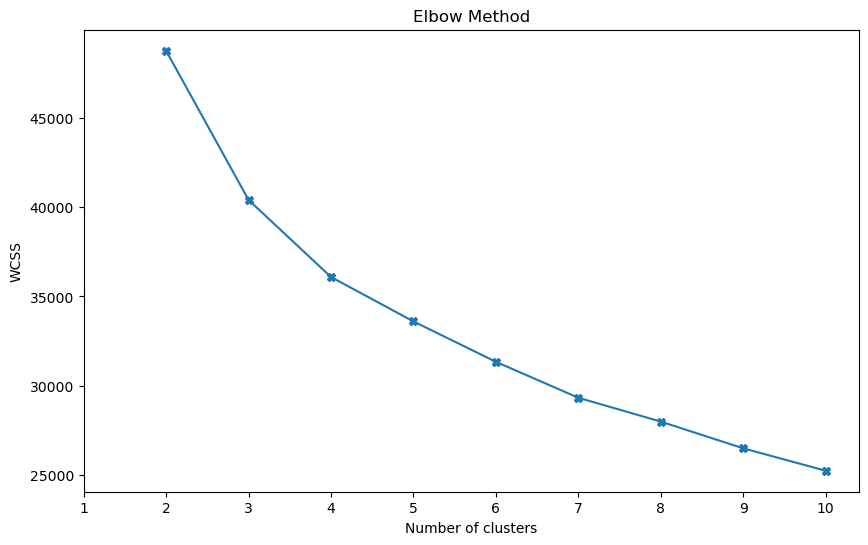

In [62]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))    
plt.plot(range(2, 11), wcss,marker='X')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

# Insight:-
Form Elbow graph We can choose optimum numbers of clusters as 4 numbers of clusters.

Lets check silhoutte score of diffrent number of clusters too.

For n_clusters = 2, silhouette_score is: 0.27547106546770445

For n_clusters = 3, silhouette_score is: 0.29265026879617106

For n_clusters = 4, silhouette_score is: 0.20184492992085984

For n_clusters = 5, silhouette_score is: 0.2094330141241945

For n_clusters = 6, silhouette_score is: 0.1780537180905408

For n_clusters = 7, silhouette_score is: 0.1909665238475349

For n_clusters = 8, silhouette_score is: 0.15809394236579857

For n_clusters = 9, silhouette_score is: 0.16202623292089455

For n_clusters = 10, silhouette_score is: 0.17351452985631355



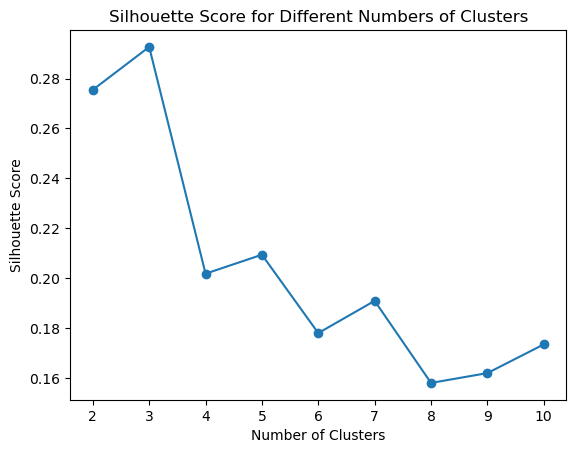

In [63]:
silhouette_scores = []
n_clusters_range = range(2, 11)

for i in n_clusters_range:
    KMean_cluster1 = KMeans(i, random_state=0)
    KMean_labels1 = KMean_cluster1.fit_predict(data_std)
    silhouette_score1 = silhouette_score(data_std, KMean_labels1)
    silhouette_scores.append(silhouette_score1)
    print(f"For n_clusters = {i}, silhouette_score is: {silhouette_score1}")
    print()

# Plotting the silhouette scores
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Insight
after 3 number of cluster with score 0.29 there is sudden drop in score for furter numbers.

As we from Elbow graph and shiloutte score we are getting 3 number as optimum cluster numbers for KMeans clustring..

In [73]:
clusters_kmean_f = KMeans(3, random_state=0)
clusters_kmean_f.fit(data_std)
clusters_kmean_f.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [74]:
df['Clusters']=clusters_kmean_f.labels_

0    1618
1    1060
2      26
Name: Clusters, dtype: int64


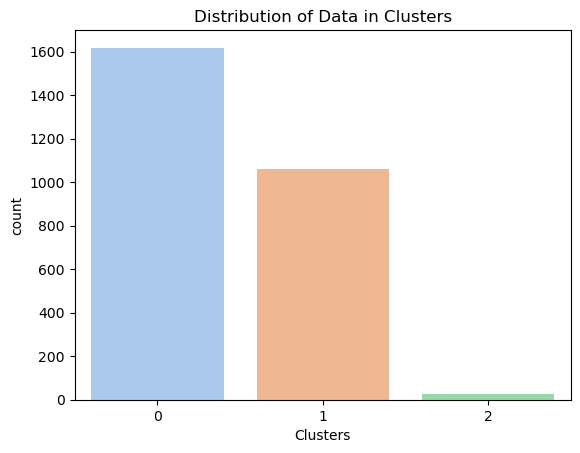

In [75]:
# distribution of data in all clusters
sns.countplot(x='Clusters', data=df, palette="pastel")
plt.title('Distribution of Data in Clusters')
print(df["Clusters"].value_counts())

In [76]:
print('% vise distribution of data :-\n')
    
print(f' {round((141/2109)*100,2)}% of data lies in Cluster 0')
print(f'{round((993/2109)*100,2)}% of data lies in Cluster 1')
print(f'{round((542/2109)*100,2)}%  of data lies in Cluster 2')
print(f'{round((433/2109)*100,2)}% of data lies in Cluster 3')

% vise distribution of data :-

 6.69% of data lies in Cluster 0
47.08% of data lies in Cluster 1
25.7%  of data lies in Cluster 2
20.53% of data lies in Cluster 3


In [77]:
df.Clusters.describe()

count    2704.000000
mean        0.411243
std         0.511321
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Clusters, dtype: float64

(array([1618.,    0., 1060.,   26.]),
 array([0. , 0.5, 1. , 1.5, 2. ]),
 <BarContainer object of 4 artists>)

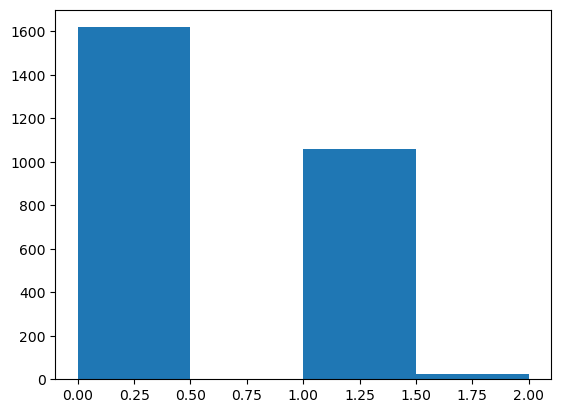

In [78]:
plt.hist(df.Clusters,bins=4)

{'whiskers': [<matplotlib.lines.Line2D at 0x2306bfa97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2306bfa9d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2306bfa9520>],
 'medians': [<matplotlib.lines.Line2D at 0x2306bfb6370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2306bfb6640>],
 'means': []}

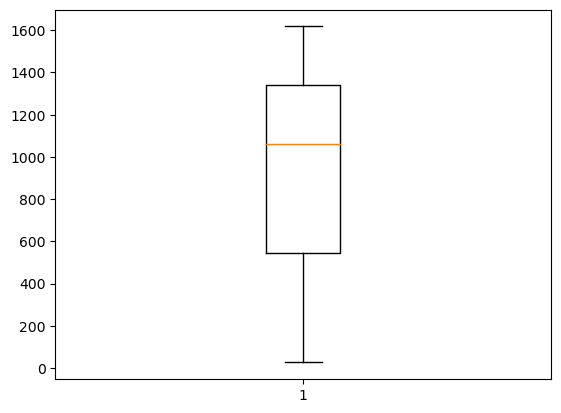

In [79]:
plt.boxplot(df.Clusters.value_counts())

# Insight
From KMeans method we are getting best clustering. with good distribution of data.

# DBSCAN
We are going to use the DBSCAN for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density.

In [81]:
from sklearn.cluster import DBSCAN

In [82]:
for i in range(2, 11):
    dbscan = DBSCAN(eps=2, min_samples=25)
    dbscan_labels1 =  dbscan.fit_predict(data_std)
    silhouette_score1 = silhouette_score(data_std, dbscan_labels1)
    print(f"For n_clusters = {i} silhouette_score is :- {silhouette_score1}")
    print()

For n_clusters = 2 silhouette_score is :- 0.1887171916146285

For n_clusters = 3 silhouette_score is :- 0.1887171916146285

For n_clusters = 4 silhouette_score is :- 0.1887171916146285

For n_clusters = 5 silhouette_score is :- 0.1887171916146285

For n_clusters = 6 silhouette_score is :- 0.1887171916146285

For n_clusters = 7 silhouette_score is :- 0.1887171916146285

For n_clusters = 8 silhouette_score is :- 0.1887171916146285

For n_clusters = 9 silhouette_score is :- 0.1887171916146285

For n_clusters = 10 silhouette_score is :- 0.1887171916146285



In [83]:
dbscan = DBSCAN(eps=2, min_samples=25)
dbscan.fit(df_std)

DBSCAN(eps=2, min_samples=25)

In [84]:
#Noisy samples are given the label -1.
clusters=dbscan.labels_
clusters

array([ 0, -1,  0, ..., -1, -1,  0], dtype=int64)

In [85]:
len(clusters[clusters==-1])

813

In [86]:
df['Clusters']=clusters

In [87]:
df.Clusters.value_counts()

 0    1891
-1     813
Name: Clusters, dtype: int64

# Data counts in each clusters.

(array([ 813., 1891.]),
 array([-1. , -0.5,  0. ]),
 <BarContainer object of 2 artists>)

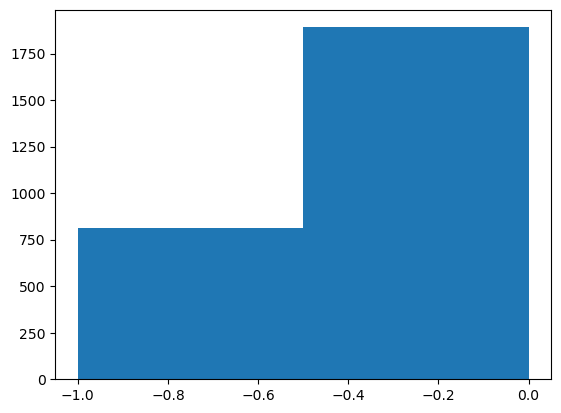

In [88]:
bins=len(df.Clusters.value_counts())
plt.hist(df.Clusters,bins=bins,histtype='bar')

Insight:- From DBscane after tuning hyper perameter by triel and error method we got 4 cluster.

But the distribution of data in all cluster is not good

# Conclusion
From Hierarchical Clustering:- We performed clustering with 6,4,2 number of cluster which are determind using shilhoutte score, but data is not uniformly distributed between clusters.

From Kmeans Clustering:- We are getting 3 number as optimum number of clusters from Elbow graph and shiloutte score, and data is also uniformpy distributed among the clusters

From DBScan Clustring:- From DBscane after tunning hyper perameter by triel and error method we got 2 cluster,But the distribution of data in all cluster is not good

We will use Kmeans clustering with 2 number of clusters